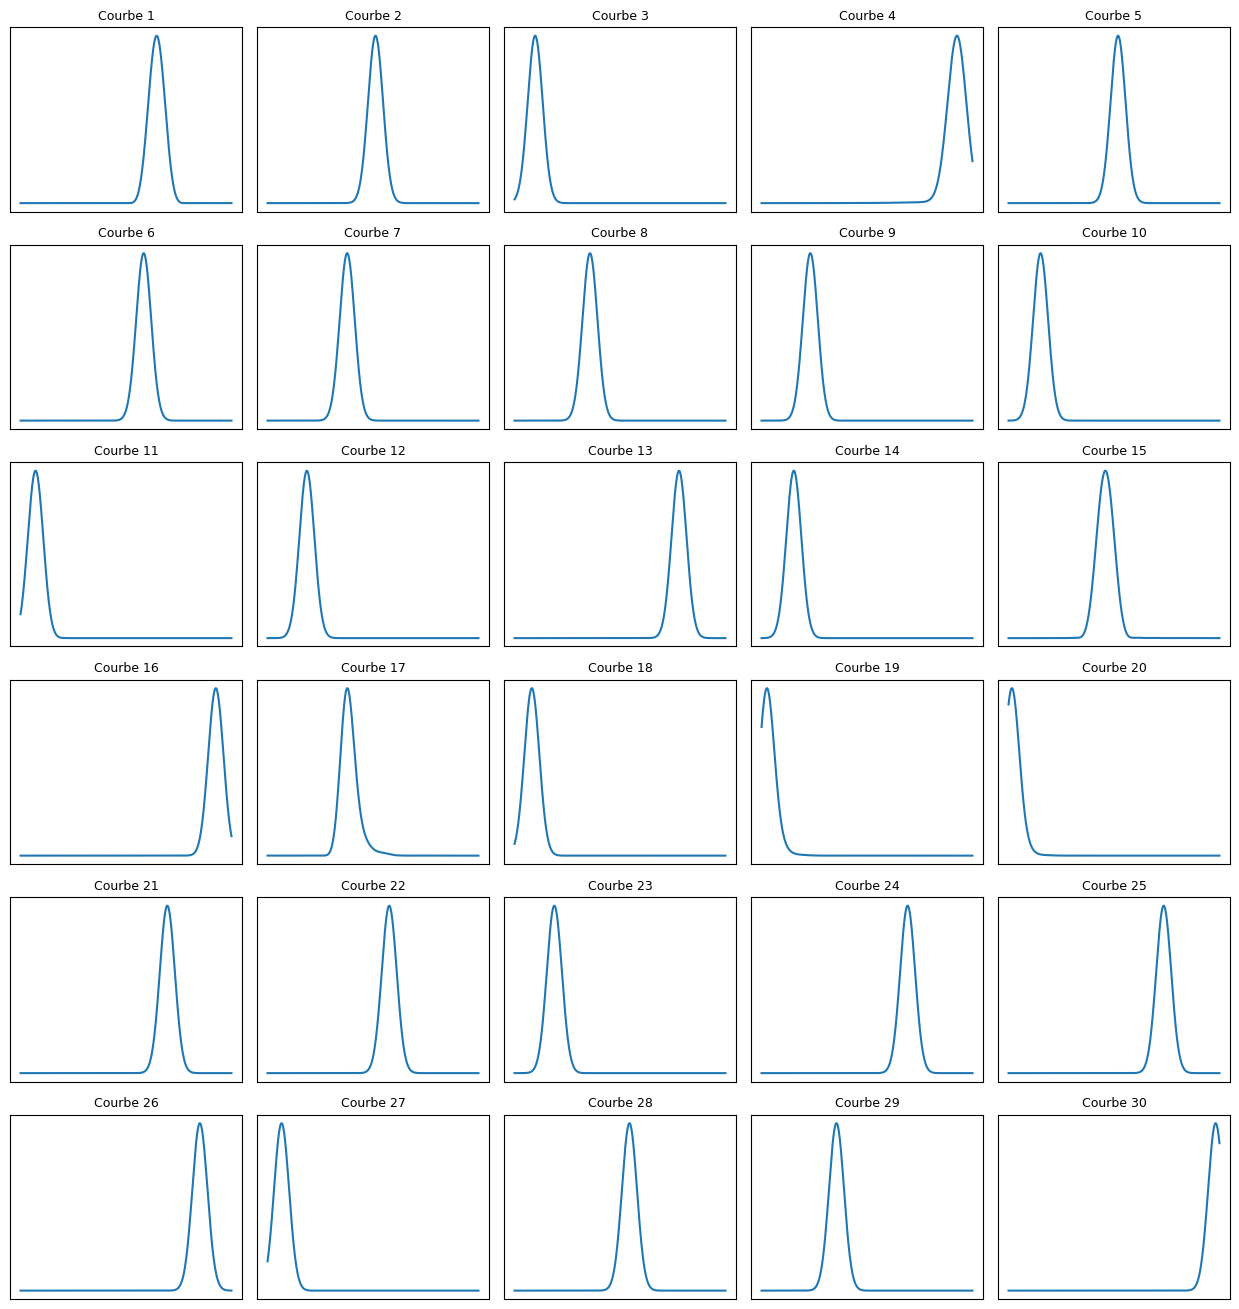

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Chargement des données
X_data = np.load('C:\\Users\\gabriel.legros\\Documents\\VSCode\\Github\\C2N\\VAE\\data\\X_data_array_5000.npy')
y_data = np.load('C:\\Users\\gabriel.legros\\Documents\\VSCode\\Github\\C2N\\VAE\\data\\y_data_array_5000.npy')

# Réduction de Y : on prend 1 point sur 10 (axis=1)
y_data = y_data[:, ::10]  # (n, 500)

# Affichage des 30 premières courbes, une par subplot
n_examples = 30
n_cols = 5
n_rows = 6

plt.figure(figsize=(2.5*n_cols, 2.2*n_rows))
for i in range(n_examples):
    plt.subplot(n_rows, n_cols, i+1)
    plt.plot(np.arange(1, 501), y_data[i])
    plt.title(f"Courbe {i+1}", fontsize=9)
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()


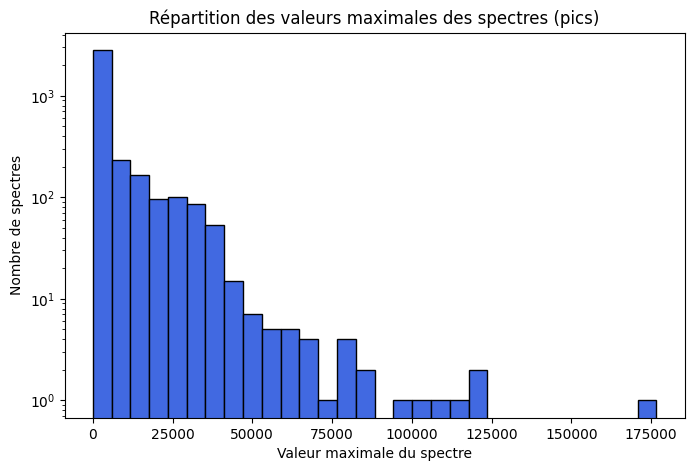

In [6]:
# Calcul des valeurs maximales pour chaque spectre
max_values = np.max(y_data, axis=1)

# Affichage de l'histogramme des valeurs maximales
plt.figure(figsize=(8, 5))
plt.hist(max_values, bins=30, color='royalblue', edgecolor='black')
plt.yscale('log')
plt.xlabel("Valeur maximale du spectre")
plt.ylabel("Nombre de spectres")
plt.title("Répartition des valeurs maximales des spectres (pics)")
plt.show()

In [8]:
print("Min:", np.min(max_values))
print("Max:", np.max(max_values))
print("Moyenne:", np.mean(max_values))
print("Médiane:", np.median(max_values))

Min: 0.010001136
Max: 176668.4
Moyenne: 5309.7803
Médiane: 324.10077


In [26]:
import torch
import sys
sys.path.append('C:\\Users\\gabriel.legros\\Documents\\VSCode\\Github\\C2N\\VAE')

from VAE.vae import VAE
from loss.loss import vae_loss
from optimisation.optimisation import run_optuna
from data_processing.dataload import load_normalize_data
import json
import matplotlib.pyplot as plt
from torch.utils.data import random_split, DataLoader

6.1.2


C:\Users\gabriel.legros\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [36]:
latent_dim = 32
hidden_dim_list = [256, 128]  # 5 couches au lieu de 6
lr = 0.0001                              #   best_params["lr"]
dropout = 0
print("Best parameters found:")
print("Latent dimension:", latent_dim)
print("Hidden dimensions:", hidden_dim_list)
print("Learning rate:", lr)
print("Dropout rate:", dropout)

Best parameters found:
Latent dimension: 32
Hidden dimensions: [256, 128]
Learning rate: 0.0001
Dropout rate: 0


In [37]:
import numpy as np
from torch.utils.data import DataLoader, TensorDataset, random_split
import torch

# Chargement des données
X_data = np.load('C:\\Users\\gabriel.legros\\Documents\\VSCode\\Github\\C2N\\VAE\\data\\X_data_array_5000.npy')
y_data = np.load('C:\\Users\\gabriel.legros\\Documents\\VSCode\\Github\\C2N\\VAE\\data\\y_data_array_5000.npy')

# Réduction de Y : on prend 1 point sur 10 (axis=1)
y_data = y_data[:, ::10]  # (n, 500)

# Filtrage : on garde seulement les samples dont le pic >= 15000
max_values = np.max(y_data, axis=1)
mask = max_values >= 15000
X_data_filtered = X_data[mask]
y_data_filtered = y_data[mask]

# Standardisation (adapte selon ta fonction standardize)
from normalize import standardize
X_scaled, y_scaled, scaler_x, scaler_y = standardize(X_data_filtered, y_data_filtered)

# Création du dataset
dataset = TensorDataset(X_scaled, y_scaled)

# Split du dataset en train et test (80%/20%)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

dataloader_train = DataLoader(train_dataset, batch_size=64, shuffle=True)
dataloader_test = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Pour affichage des shapes
data_iter = iter(dataloader_train)
X_batch, y_batch = next(data_iter)
print("X_batch shape:", X_batch.shape)
print("y_batch shape:", y_batch.shape)

dim_x = X_batch.shape[1]
dim_y = y_batch.shape[1]
print("dim_x:", dim_x)
print("dim_y:", dim_y)

input_dim = dim_x + dim_y
print("Input dimension:", input_dim)

# ============================================================
# Configuration du device
# ============================================================
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Using device:", device)

X_batch shape: torch.Size([64, 4])
y_batch shape: torch.Size([64, 500])
dim_x: 4
dim_y: 500
Input dimension: 504
Using device: cuda


Epoch 1/1000, Train Loss: 0.5508, Val Loss: 0.5755
Epoch 2/1000, Train Loss: 0.5389, Val Loss: 0.5623
Epoch 3/1000, Train Loss: 0.5243, Val Loss: 0.5489
Epoch 4/1000, Train Loss: 0.5100, Val Loss: 0.5346
Epoch 5/1000, Train Loss: 0.4937, Val Loss: 0.5190
Epoch 6/1000, Train Loss: 0.4783, Val Loss: 0.5020
Epoch 7/1000, Train Loss: 0.4625, Val Loss: 0.4884
Epoch 8/1000, Train Loss: 0.4477, Val Loss: 0.4709
Epoch 9/1000, Train Loss: 0.4310, Val Loss: 0.4598
Epoch 10/1000, Train Loss: 0.4219, Val Loss: 0.4495
Epoch 11/1000, Train Loss: 0.4124, Val Loss: 0.4435
Epoch 12/1000, Train Loss: 0.4054, Val Loss: 0.4369
Epoch 13/1000, Train Loss: 0.4029, Val Loss: 0.4325
Epoch 14/1000, Train Loss: 0.3991, Val Loss: 0.4304
Epoch 15/1000, Train Loss: 0.3983, Val Loss: 0.4259
Epoch 16/1000, Train Loss: 0.3968, Val Loss: 0.4279
Epoch 17/1000, Train Loss: 0.3899, Val Loss: 0.4238
Epoch 18/1000, Train Loss: 0.3888, Val Loss: 0.4236
Epoch 19/1000, Train Loss: 0.3882, Val Loss: 0.4215
Epoch 20/1000, Train 

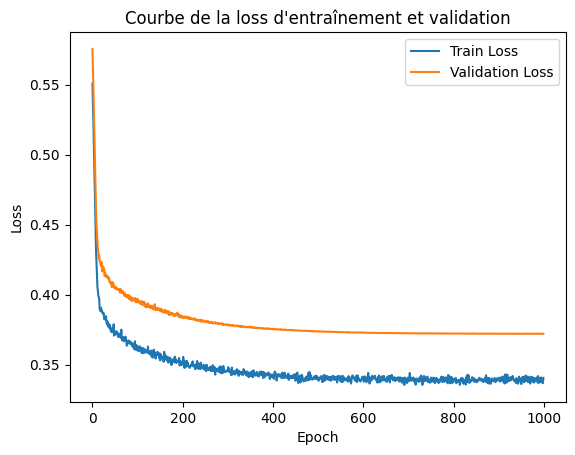

In [38]:

# ============================================================
# Initialisation du modèle et de l'optimiseur
# ============================================================
vae = VAE(input_dim=input_dim, latent_dim=latent_dim, hidden_dim_list=hidden_dim_list, dropout=dropout).to(device)

optimizer = torch.optim.Adam(vae.parameters(), lr=lr)
#scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=30, min_lr=1e-6)

num_epochs = 1000

# ============================================================
# Boucle d'entraînement
# ============================================================
train_losses = []
val_losses = []

for epoch in range(num_epochs):

    epoch_loss = 0.0
    vae.train()

    for x_batch, y_batch in dataloader_train:
        xy_batch = torch.cat([x_batch, y_batch], dim=1).to(device)

        recon, mu, log_var = vae(xy_batch)
        loss_batch = vae_loss(recon, xy_batch, mu, log_var)

        optimizer.zero_grad()
        loss_batch.backward()
        optimizer.step()

        epoch_loss += loss_batch.item()

    avg_loss = epoch_loss / len(dataloader_train)
    train_losses.append(avg_loss)

    # Validation
    vae.eval()
    val_loss = 0.0
    with torch.no_grad():
        for x_val, y_val in dataloader_test:
            xy_val = torch.cat([x_val, y_val], dim=1).to(device)
            recon, mu, log_var = vae(xy_val)
            loss = vae_loss(recon, xy_val, mu, log_var)
            val_loss += loss.item()
    avg_val_loss = val_loss / len(dataloader_test)
    val_losses.append(avg_val_loss)
    #scheduler.step(avg_val_loss)

    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {avg_loss:.4f}, Val Loss: {avg_val_loss:.4f}")

# ============================================================
# Affichage de la courbe de loss d'entraînement et validation
# ============================================================
plt.figure()
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Courbe de la loss d'entraînement et validation")
plt.legend()
plt.show()

recon_x shape: (64, 4)
recon_y shape: (64, 500)
X normalisé: [ 0.24370752  0.28624913 -0.13861498 -0.18155567]
Y normalisé: [-0.17782088 -0.17896917 -0.17940706 -0.18114856 -0.18198249 -0.18401551
 -0.1852629  -0.18749328 -0.19018151 -0.19185102 -0.19381794 -0.19640145
 -0.19881687 -0.20155331 -0.2035293  -0.20692891 -0.20897096 -0.2117821
 -0.21479127 -0.21691145 -0.21921334 -0.22150178 -0.2244337  -0.22704081
 -0.22901678 -0.23053718 -0.23211315 -0.2343322  -0.23656538 -0.23798934
 -0.23981036 -0.24197699 -0.24335536 -0.24544823 -0.24731436 -0.24860701
 -0.25057763 -0.25225148 -0.2549216  -0.25628653 -0.25776455 -0.26091588
 -0.26212794 -0.2644893  -0.2660891  -0.26830792 -0.26991013 -0.27226233
 -0.27369604 -0.2755754  -0.27690557 -0.27863026 -0.27992433 -0.28143498
 -0.2821885  -0.28392228 -0.28410083 -0.28545886 -0.2857569  -0.28718293
 -0.286612   -0.28734666 -0.2877464  -0.28798172 -0.2895425  -0.28961712
 -0.2901723  -0.2903245  -0.2918845  -0.292798   -0.29228398 -0.293498
 -0

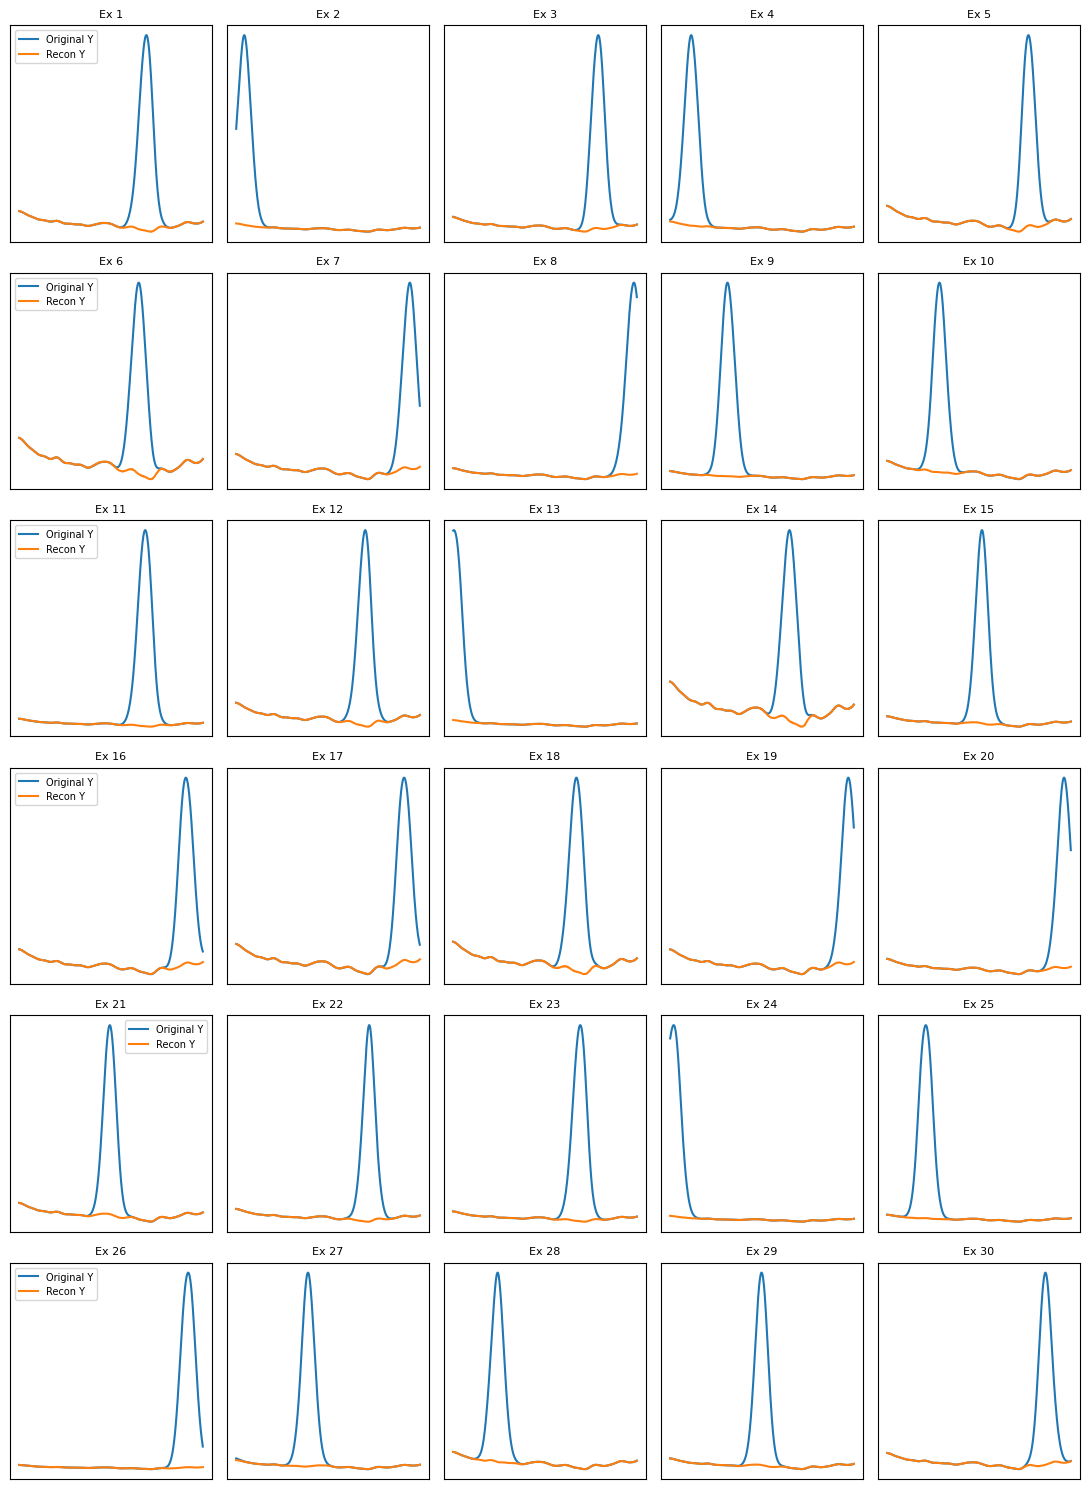

In [39]:
# ============================================================
# Prédiction et reconstruction sur un batch de test
# ============================================================

vae.eval()
with torch.no_grad():
    # Prendre un batch de test
    x_batch, y_batch = next(iter(dataloader_test))
    xy_batch = torch.cat([x_batch, y_batch], dim=1).to(device)

    # Reconstruction
    recon, mu, log_var = vae(xy_batch)

    # Convertir en numpy
    recon_np = recon.cpu().numpy()
    original_np = xy_batch.cpu().numpy()

# Séparer X et y dans la reconstruction et les données originales
recon_x = recon_np[:, :dim_x]
recon_y = recon_np[:, dim_x:]
print("recon_x shape:", recon_x.shape)
print("recon_y shape:", recon_y.shape)
print("X normalisé:", recon_x[0])
print("Y normalisé:", recon_y[0])

orig_x = original_np[:, :dim_x]
orig_y = original_np[:, dim_x:]
print("orig_x shape:", orig_x.shape)
print("orig_y shape:", orig_y.shape)
print("X normalisé:", orig_x[0])
print("Y normalisé:", orig_y[0])

n_examples = 30
n_cols = 5
n_rows = n_examples // n_cols

plt.figure(figsize=(2.2*n_cols, 2.5*n_rows))
for i in range(n_examples):
    plt.subplot(n_rows, n_cols, i+1)
    plt.plot(orig_y[i], label='Original Y')
    plt.plot(recon_y[i], label='Recon Y')
    plt.title(f"Ex {i+1}", fontsize=8)
    plt.xticks([])
    plt.yticks([])
    if i % n_cols == 0:
        plt.legend(fontsize=7)
plt.tight_layout()
plt.show()